In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd

In [2]:
wkdir = '/Users/Marianne/Dropbox (Personlig)/DTU/9. semester/02456_Deep_learning/project/results/'

# Visualize performances

In [3]:
# Load performances
performance = pd.read_csv(wkdir+'model_performances.csv', sep=';')
performance.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
0,CBoW,before,1,2,18.041133,0.000,0.3
1,CBoW,before,5,2,17.910000,0.143,0.1
2,CBoW,before,10,2,17.870000,0.143,0.2
3,CBoW,before,20,2,17.872976,0.143,0.4
4,CBoW,after,1,2,18.000508,0.000,0.2


In [4]:
c_pre = performance.loc[performance.direction == 'before']
c_post = performance.loc[performance.direction == 'after']
c_both = performance.loc[performance.direction == 'both']
c_pre.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
0,CBoW,before,1,2,18.041133,0.000,0.3
1,CBoW,before,5,2,17.910000,0.143,0.1
2,CBoW,before,10,2,17.870000,0.143,0.2
3,CBoW,before,20,2,17.872976,0.143,0.4
12,SG,before,1,2,639.993000,0.000,0.1


In [5]:
c_post.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
4,CBoW,after,1,2,18.000508,0.000,0.20
5,CBoW,after,5,2,17.940000,0.143,0.10
6,CBoW,after,10,2,17.890000,0.143,0.05
7,CBoW,after,20,2,17.866107,0.143,0.25
15,SG,after,1,2,639.993000,0.143,0.10


In [6]:
c_both.head()

,model,direction,window_size,embedding_dimension,perplexity,acc_ar,acc_b62
8,CBoW,both,1,2,17.989137,0.143,0.20
9,CBoW,both,5,2,17.800000,0.143,0.15
10,CBoW,both,10,2,17.740000,0.143,0.20
11,CBoW,both,20,2,17.729718,0.000,0.40
18,SG,both,1,2,4.000000,0.000,0.20


In [7]:
acc = pd.DataFrame(data={'model': c_pre.model.values, 'ws': c_pre.window_size.values, 'pre':c_pre.acc_b62.values, 'post':c_post.acc_b62.values, 'both':c_both.acc_b62.values})
acc.head()

,model,ws,pre,post,both
0,CBoW,1,0.3,0.20,0.20
1,CBoW,5,0.1,0.10,0.15
2,CBoW,10,0.2,0.05,0.20
3,CBoW,20,0.4,0.25,0.40
4,SG,1,0.1,0.10,0.20


In [8]:
perp = pd.DataFrame(data={'model': c_pre.model.values, 'ws': c_pre.window_size.values, 'pre':c_pre.perplexity.values, 'post':c_post.perplexity.values, 'both':c_both.perplexity.values})
perp.head()

,model,ws,pre,post,both
0,CBoW,1,18.041133,18.000508,17.989137
1,CBoW,5,17.910000,17.940000,17.800000
2,CBoW,10,17.870000,17.890000,17.740000
3,CBoW,20,17.872976,17.866107,17.729718
4,SG,1,639.993000,639.993000,4.000000


## Make combined plot for acc and perp

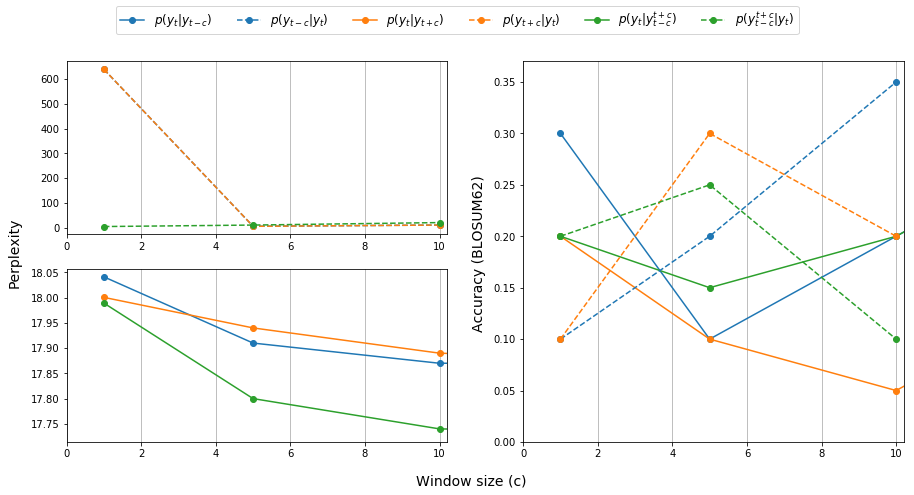

In [14]:
# Make grid of subplots
fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)

### Plot on axis
# ax1 is Skip-gram perp
s_pre, s_post, s_both = ax1.plot(perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].pre, 'o--C0', 
                           perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].post, 'o--C1', 
                           perp.loc[perp.model == 'SG'].ws, perp.loc[perp.model == 'SG'].both, 'o--C2')

# ax2 is CBoW perp
c_pre, c_post, c_both = ax2.plot(perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].pre, 'o-C0', 
                           perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].post, 'o-C1', 
                           perp.loc[perp.model == 'CBoW'].ws, perp.loc[perp.model == 'CBoW'].both, 'o-C2')

# ax3 is accuracy
c_pre, c_post, c_both = ax3.plot(acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].pre, 'o-C0', 
                           acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].post, 'o-C1', 
                           acc.loc[perp.model == 'CBoW'].ws, acc.loc[perp.model == 'CBoW'].both, 'o-C2')
s_pre, s_post, s_both = ax3.plot(acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].pre, 'o--C0', 
                           acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].post, 'o--C1', 
                           acc.loc[perp.model == 'SG'].ws, acc.loc[perp.model == 'SG'].both, 'o--C2')

# Set axis grids
for ax in [ax1, ax2, ax3]: 
    ax.set_xlim(0,10.2)
    ax.grid(which='major', axis='x')
ax3.set_ylim(0, 0.37)
    
# Set axis labels
fig.text(0.07, 0.5, 'Perplexity', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.5, 'Accuracy (BLOSUM62)', va='center', rotation='vertical', fontsize=14)

# Overall figure settings
fig.text(0.5, 0.04, 'Window size (c)', ha='center', fontsize=14)
fig.legend(handles=[c_pre, s_pre, c_post, s_post, c_both, s_both], 
           loc='upper center', 
           labels=['$p(y_t|y_{t-c})$', '$p(y_{t-c}|y_t)$', 
                   '$p(y_t|y_{t+c})$', '$p(y_{t+c}|y_t)$', 
                   '$p(y_t|y_{t-c}^{t+c})$', '$p(y_{t-c}^{t+c}|y_t)$'], 
           ncol=6, fontsize=12)

# Save plot
plt.savefig(wkdir+'performances.pdf', dpi=1000)